In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
import joblib
DATA_PATH = "C:\Projects\FIN-525\data"

def microsoft_to_iso8601(microsoft, paralelize=True):
    base_date = datetime(1899, 12, 31)
    if isinstance(microsoft, pd.Series):
        if paralelize:
            def custom_work(date):
                return (base_date + timedelta(days=date)).isoformat()
            cpu_cores = os.cpu_count() - 2 
            ret_date = joblib.Parallel(n_jobs=cpu_cores)(joblib.delayed(custom_work)(date) for date in microsoft)
        else:
            ret_date = [(base_date + timedelta(days=date)).isoformat() for date in microsoft]
    else:
        ret_date = (base_date + timedelta(days=microsoft)).isoformat()
    return ret_date

print(microsoft_to_iso8601(43981.7155208333350))
# returns 2020-05-31T17:10:21

2020-05-31T17:10:21


In [2]:
os.listdir(os.path.join(DATA_PATH, 'daily'))

['us_equities.csv.gz']

## Daily data

In [3]:
def load_daily(path=DATA_PATH):
    daily_path = os.path.join(DATA_PATH, 'daily')
    file_name = os.listdir(daily_path)[0]
    df = pd.read_csv(os.path.join(daily_path, file_name), compression='gzip', 
                         header=0, sep=',', quotechar='"')
    return df

In [4]:
daily_df = load_daily()

<AxesSubplot:>

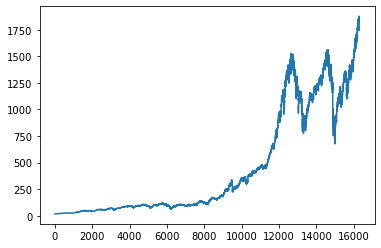

In [5]:
daily_df['^GSPC'].plot()

## HFT Data

In [6]:
sym_spy = 'SPY.P'
def load_hft(symbol, style, path=DATA_PATH, parallel=True):
    bbo_path = os.path.join(DATA_PATH, 'intraday', 'equities', 'US', 'bbo', symbol)
    trade_path = os.path.join(DATA_PATH, 'intraday', 'equities', 'US', 'trade', symbol)
    file = os.listdir(bbo_path)[0]
    if style == 'bbo':
        df = pd.read_csv(os.path.join(bbo_path, file), compression='gzip', 
                             header=0, sep=',', quotechar='"')
    if style == 'trade':
        df = pd.read_csv(os.path.join(bbo_path, file), compression='gzip', 
                             header=0, sep=',', quotechar='"')
        
    df['xltime'] = microsoft_to_iso8601(df['xltime'], parallel)
    return df

In [7]:
spy_bbo = load_hft(sym_spy, 'bbo', parallel=True)

In [8]:
spy_trade = load_hft(sym_spy, 'trade', parallel=True)

In [13]:
os.path.join(DATA_PATH, 'intraday', 'equities', 'US', 'bbo', sym_spy)

'C:\\Projects\\FIN-525\\data\\intraday\\equities\\US\\bbo\\SPY.P'

In [10]:
spy_trade

,xltime,bid-price,bid-volume,ask-price,ask-volume
0,2017-01-04T09:00:00.098000,218.00,5,0.00,0
1,2017-01-04T09:00:00.099000,218.00,5,225.88,6
2,2017-01-04T09:00:00.099000,224.12,8,225.88,6
3,2017-01-04T09:00:00.099000,224.12,8,225.23,4
4,2017-01-04T09:00:00.099000,224.12,8,224.97,3
...,...,...,...,...,...
990681,2017-01-05T00:59:47.381001,225.28,15,225.32,2
990682,2017-01-05T00:59:48.112000,225.28,12,225.32,2
990683,2017-01-05T00:59:49.571999,225.28,12,225.32,1
990684,2017-01-05T00:59:59.061999,225.27,3,225.32,1
